## 📊 Introduction to Interactive Web Applications with Shiny

### Instructor: Dr. Maryam Movahedifar

<div style="display: flex; justify-content: space-between; align-items: center;">
  <span style="display: flex; align-items: center;">
   
  </span>
  <div style="display: flex; align-items: center; margin-left: auto;">
    <img src="Uni_Logo.png" alt="Uni Logo" style="width: 100px; margin-right: 10px;">
    <img src="DSC_Logo.png" alt="DSC Logo" style="width: 150px;">
  </div>
</div>



In many research projects, data analysis results are shared as static figures or reports. However, static outputs can limit how others explore and understand the data. **Shiny**, an R package, allows you to create **interactive web applications** that make data exploration more dynamic, accessible, and reproducible — even for people without programming experience.  

This part of the course introduces the **fundamentals of Shiny**, guiding them step by step to transform standard R analyses and visualizations into **interactive dashboards and apps**. By the end of the session, you’ll be able to create and deploy your own Shiny apps to make your research outputs more engaging and shareable.

---

## 🎯 Objective
Learn how to build interactive web applications using the `Shiny` package in R, integrating dynamic user inputs and `ggplot2` visualizations.

## 🔹 Topics Covered
- **Introduction to Shiny**
  - Understanding the structure of a Shiny app (UI and server)
  - Creating a basic Shiny app with simple input-output interaction

- **Integrating `ggplot2` into Shiny**
  - Embedding `ggplot2` plots within a Shiny app
  - Making `ggplot2` plots interactive with user inputs

- **Basic Reactivity**
  - A detailed look at the server function and how input and output arguments work
  - Basic reactivity: connecting inputs directly to outputs
  - Using reactive expressions to avoid redundant calculations
  - Common pitfalls that new Shiny users often face

- **Adding Interactivity and Deployment**
  - Understanding reactive programming in Shiny (inputs and outputs)
  


# 📌 1. Introducing Shiny

Shiny is an R package for building interactive web apps. You do **not** need HTML, CSS, or JavaScript. Apps can display data, run calculations, and respond to user input in real time.

### 🔹 Why It Matters
- Supports active learning and experimentation  
- Encourages reproducibility and modular design  
- Makes abstract ideas concrete through interactivity  

### 📝 Notes
Shiny allows you to create dashboards or interactive tools entirely in R. Key advantages:  
- Learners can experiment with parameters and immediately see outcomes  
- Promotes reproducible and modular workflows  
- Makes abstract concepts easier to grasp through interactivity


# 📌 Shiny App Pieces at a Glance

<div style="text-align: center;">
<img src="shiny.app.png" alt="Shiny App Structure" width="80%">
</div>

### 🔹 Key Concepts
- **UI (User Interface)**: Controls the layout and appearance of the app (buttons, text boxes, plots)  
- **Server**: Handles logic, processes inputs, and generates outputs  
- **shinyApp(ui, server)**: Connects the UI and server to launch the app  

### 📝 Notes
- UI = appearance  
- Server = logic  
- `shinyApp()` = connects both and runs the app



# 📌  How the UI and Server Communicate

<div style="text-align: center;">
<img src="shiny.app.1.png" alt="UI and Server Communication" width="70%">
</div>

### 🔹 Flow of Data
1. **User input** in the UI (e.g., `methodInput("ID")`)  
2. Input travels to the **server** and is accessed via `input$ID`  
3. Server processes the input (calculations, filtering, plotting, etc.)  
4. Server sends the output to the UI via `output$value`  
5. UI displays the result using `typeOutput("value")`  

### 📝 Notes
- The process is **reactive**: outputs update automatically whenever inputs change  
- Flow summary: **User input → Server processes → Output displayed in UI**



### 1.1 Create a Basic Shiny App

First, let's write a simple Shiny app where we take user input (a text input) and display it as output.


In [1]:
install.packages("shiny")
# Load the shiny package
library(shiny)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
# Then define the user interface, the HTML webpage that humans interat with. In this case it is a page containing the words "Hello, world!"
ui <- fluidPage(
  "Hello, world!"
)

# then specifies the behaviour of our app by defining a server function. It is currently empty, so our app does not do anything.
server <- function(input, output, session) {
}


In [2]:
# Following executes shinyapp to construct and start a shiny application from ui and server.
shinyApp(ui, server)



Listening on http://127.0.0.1:5155



In [3]:
#shinyApp(ui = ui, server = server, options = list(port = 3647, host = "0.0.0.0"))


### 🔹 Explanation of the Code:

#### **UI Component**:
- **`fluidPage()`**: This function is used to create a responsive page layout. It adjusts based on the screen size.
- **`textInput("text", "Enter text:", value = "Hello, World!")`**: This line creates a text input box where the user can type. The ID for this input is `"text"`, and the default value is `"Hello, World!"`.
- **`textOutput("output")`**: This specifies where the output will be shown. The ID `"output"` links this element to the `renderText()` output in the server function.

#### **Server Component**:
- **`server` function**: This function defines the logic of the Shiny app. It specifies how the app should behave based on user inputs.
- **`output$output <- renderText({ input$text })`**: This line connects the input and output. It tells Shiny to take the text entered by the user (`input$text`) and render it as text in the `"output"` section of the UI.

#### **`shinyApp()`**:
- This function takes both the UI and server components and combines them to form a Shiny app. Once this function is run, it launches the app in a web browser.


## 1.2 Running and Stopping

There are a few ways you can run this app:

- Click the **Run App** button in the document toolbar.
- Use the keyboard shortcut: `Cmd/Ctrl + Shift + Enter`.
- If you’re not using RStudio, you can source the entire document with `source()` or call `shiny::runApp()` with the path to the directory containing `app.R`.



Before you close the app, go back to RStudio and look at the R console. You’ll notice that it says something like:
Listening on http://127.0.0.1:3204



This tells you the URL where your app can be found: `127.0.0.1` is a standard address that means “this computer,” and `3204` is a randomly assigned port number. You can enter that URL into any compatible web browser to open another copy of your app.

Also, notice that R is busy: the R prompt isn’t visible, and the console toolbar displays a stop sign icon. While a Shiny app is running, it “blocks” the R console. This means that you can’t run new commands at the R console until the Shiny app stops.

### Stopping the App

You can stop the app and return access to the console using any one of these options:

- Click the **stop sign** icon on the R console toolbar.
- Click on the console, then press **Esc** (or press **Ctrl + C** if you’re not using RStudio).
- Close the Shiny app window.


## 1.3 Adding UI Controls

Next, we’ll add some inputs and outputs to our UI so it’s not quite so minimal. We’re going to make a very simple app that shows you all the built-in data frames included in the `datasets` package.

Replace your `ui` with this code:


In [4]:
ui <- fluidPage(
  selectInput("dataset", label = "Dataset", choices = ls("package:datasets")),
  verbatimTextOutput("summary"),
  tableOutput("table")
)

This example uses four functions:

- `fluidPage()` is a layout function that sets up the basic visual structure of the page.

- `selectInput()` is an input control that lets the user interact with the app by providing a value. In this case, it’s a select box with the label “Dataset” and lets you choose one of the built-in datasets that come with R. 

- `verbatimTextOutput()` and `tableOutput()` are output controls that tell Shiny where to put rendered output (we’ll get into the how in a moment). `verbatimTextOutput()` displays code and `tableOutput()` displays tables.

Layout functions, inputs, and outputs have different uses, but they are fundamentally the same under the covers: they’re all just fancy ways to generate HTML, and if you call any of them outside of a Shiny app, you’ll see HTML printed out at the console. Don’t be afraid to poke around to see how these various layouts and controls work under the hood.


In [5]:
#shinyApp(ui, server)

## 1.4 Adding Behaviour

Next, we’ll bring our outputs to life by defining them in the **server** function.

Shiny uses **reactive programming** to make apps interactive.  
This means your app **automatically updates** whenever something changes — for example, when a user clicks a button or selects a new option.

It’s important to understand that reactive programming is about **telling Shiny how** to perform a computation, not **ordering it to do so immediately**.  
Think of it like the difference between **writing a recipe** and **telling someone to make you a sandwich right now**.

So, when you write code in Shiny, you’re not saying:

> “Do this right now!”

You’re saying:

> “Here’s what to do **when** something changes.”

Now, let’s tell Shiny how to fill in the **summary** and **table** outputs in our sample app by providing the “recipes” for those outputs.  
Replace your empty server function with this code:


In [6]:
server <- function(input, output, session) {
  output$summary <- renderPrint({
    dataset <- get(input$dataset, "package:datasets")
    summary(dataset)
  })
  
  output$table <- renderTable({
    dataset <- get(input$dataset, "package:datasets")
    dataset
  })
}

The left-hand side of the assignment operator (`<-`), `output$ID`, indicates that you’re providing the recipe for the Shiny output with that ID. The right-hand side of the assignment uses a specific render function to wrap some code that you provide. Each `render{Type}` function is designed to produce a particular type of output (e.g., text, tables, and plots), and is often paired with a `{type}Output` function. For example, in this app, `renderPrint()` is paired with `verbatimTextOutput()` to display a statistical summary with fixed-width (verbatim) text, and `renderTable()` is paired with `tableOutput()` to show the input data in a table.

Run the app again and play around, watching what happens to the output when you change an input.


Notice that the summary and table update whenever you change the input dataset. This dependency is created implicitly because we’ve referred to `input$dataset` within the output functions. `input$dataset` is populated with the current value of the UI component with the id `dataset`, and will cause the outputs to automatically update whenever that value changes. 

This is the essence of reactivity: outputs automatically react (recalculate) when their inputs change.


# 2. Basic UI

## Shiny's Built-in Input Controls  

The following sections introduce the various input controls available in Shiny, grouped by their functionality. This serves as a **quick overview** of the available options rather than an exhaustive guide.  

For each input type, I’ll highlight the **key parameters**, but for a complete list of arguments and advanced configurations, refer to the official documentation.  


## 2.1 Free Text Inputs 

Shiny provides several functions for collecting **text input** from users. These inputs allow users to type in words, sentences, or even longer pieces of text that your app can use for display, analysis, or processing.

- **`textInput()`** is used for collecting short pieces of text, such as a name, title, or a single word.  
- **`passwordInput()`** works like `textInput()` but hides the characters as the user types — useful for sensitive information like passwords or access keys.  
- **`textAreaInput()`** creates a larger text box, suitable for collecting longer responses, comments, or descriptions. You can also control its size using the `rows` argument.

Here’s an example that includes all three:



In [7]:
ui <- fluidPage(
  textInput("name", "What's your name?"),
  passwordInput("password", "What's your password?"),
  textAreaInput("story", "Tell me about yourself", rows = 3)
)

## 2.2 Numeric Inputs

Shiny provides several ways to collect **numeric values** from users:

- **`numericInput()`** creates a standard input box where users can type a number. You can also set minimum, maximum, and step values to constrain the input.  
- **`sliderInput()`** creates a slider that users can drag to select a value (or a range of values).  

  - If you provide a **length-2 numeric vector** for the default value, `sliderInput()` becomes a **range slider** with two handles for selecting a minimum and maximum.  
  - Sliders are **highly customizable** in Shiny. You can adjust their size, step increments, orientation, colors, and even add animation for continuous updates.

These tools make it easy to **guide users to valid numeric input** while giving them an interactive and intuitive interface.

For a full guide to all slider options and customizations, check out the official documentation:  

🔗 [Shiny Slider Inputs](https://shiny.rstudio.com/articles/sliders.html)



In [8]:
ui <- fluidPage(
  numericInput("num", "Number one", value = 0, min = 0, max = 100),
  sliderInput("num2", "Number two", value = 50, min = 0, max = 100),
  sliderInput("rng", "Range", value = c(10, 20), min = 0, max = 100)
)

## 2.3 Dates

Shiny makes it easy to collect **date information** from users using:

- **`dateInput()`** – lets the user select a **single day** from a convenient calendar picker.  
- **`dateRangeInput()`** – allows the user to select a **range of two dates** (start and end) with a calendar interface.


In [9]:
ui <- fluidPage(
  dateInput("dob", "When were you born?"),
  dateRangeInput("holiday", "When do you want to go on vacation next?")
)

## 2.4 Limited Choices  

Shiny provides two main ways to let users **choose from a predefined set of options**:

- **`selectInput()`** – creates a **dropdown menu**, ideal when you have a long list of choices or want to save space on the page.  
- **`radioButtons()`** – creates a set of **radio buttons**, allowing users to see all options at once and select one.

Here’s an example:



In [10]:
animals <- c("dog", "cat", "mouse", "bird", "other", "I hate animals")

ui <- fluidPage(
  selectInput("state", "What's your favourite state?", state.name),
  radioButtons("animal", "What's your favourite animal?", animals)
)

## 2.5 Radio Buttons

Radio buttons in Shiny have some useful features:  

- **Display all options at once** – ideal for short lists where you want users to see every choice immediately.  
- **Custom labels and values** – using the `choiceNames` and `choiceValues` arguments, you can show something different to the user than what your server receives.  

  - `choiceNames` defines **what the user sees**.  
  - `choiceValues` defines **what Shiny passes to your server**.  

This flexibility allows you to present more user-friendly labels while keeping consistent or concise values for your calculations and logic in the server.


In [11]:
ui <- fluidPage(
  radioButtons("rb", "Choose one:",
    choiceNames = list(
      icon("angry"),
      icon("smile"),
      icon("sad-tear")
    ),
    choiceValues = list("angry", "happy", "sad")
  )
)

## 2.6 Dropdowns  

Dropdowns created with `selectInput()` take up the same amount of space, regardless of the number of options, making them more suitable for longer lists.  

You can also set `multiple = TRUE` to allow the user to select multiple elements.  


In [12]:
ui <- fluidPage(
  selectInput(
    "state", "What's your favourite state?", state.name,
    multiple = TRUE
  )
)

## 2.7 Checkbox Groups  

There’s no way to select multiple values with radio buttons, but there’s an alternative that’s conceptually similar: `checkboxGroupInput()`.  


In [13]:
ui <- fluidPage(
  checkboxGroupInput("animal", "What animals do you like?", animals)
)

## 2.8 Single Checkbox  

If you want a single checkbox for a single yes/no question, use `checkboxInput()`.  


In [14]:
ui <- fluidPage(
  checkboxInput("cleanup", "Clean up?", value = TRUE),
  checkboxInput("shutdown", "Shutdown?")
)

## 2.9 File Uploads  

Allow the user to upload a file with `fileInput()`.  


In [15]:
ui <- fluidPage(
  fileInput("upload", NULL)
)

## 2.10 Action Buttons  

Let the user perform an action with `actionButton()` or `actionLink()`.  


In [16]:
ui <- fluidPage(
  actionButton("click", "Click me!"),
  actionButton("drink", "Drink me!", icon = icon("cocktail"))
)

# 3 Basic Reactivity  

## 3.0 Introduction  

In Shiny, the logic inside the **server** is built using something called **reactive programming**.  

**Reactivity** means that your app can automatically update its results whenever an input changes. For example, if a user moves a slider or selects a different option, Shiny will instantly recalculate and refresh the related outputs without you having to write extra update code.  

This makes your app feel dynamic and responsive — the values and results stay in sync with user actions.  

This section gives a **simple introduction** to reactivity in Shiny and explains:  
- How the **server function** works, including the roles of the `input` and `output` objects.  
- How **basic reactivity** connects user inputs directly to outputs.  
- What **reactive expressions** are and how they help avoid repeating calculations.  
- Some **common mistakes** beginners run into when working with reactivity.  
  

## 3.1 The Server Function  

As you have seen every Shiny app follows this basic structure:  

In [ ]:
library(shiny)

ui <- fluidPage(
  # front end interface
)

server <- function(input, output, session) {
  # back end logic
}

shinyApp(ui, server)

## 3.1.1 Server Function Overview  

The **ui** defines the front end of a Shiny app, showing the same HTML structure to every user.  
The **server** function, however, is a bit different — it runs separately for each person who opens the app.  

This separation is important because it ensures that **each user has their own session**. In other words, when one person changes a value or input, it won’t affect what other users see.  

To make this work, Shiny automatically calls the `server()` function every time someone starts a new session. Each session gets its **own private environment**, so:  
- Every user has their own independent state.  
- Variables and data inside one session are not shared with others.  
- Most of the app’s reactive logic happens inside the `server` function.  

### 3.1.2 Server Function Parameters  

The `server` function takes three main parameters:  
- **`input`** – Stores everything the user enters or selects in the UI.  
- **`output`** – Defines what appears in the UI and updates automatically when data changes.  
- **`session`** – Provides extra tools for managing the user’s connection to the app. For example, it can control things like sending messages to the client, updating inputs, or ending the session when a user closes the app.  

You don’t need to create these objects yourself — Shiny automatically provides them when your app runs. The next sections will focus on `input` and `output`.  



## 3.2.1 Input  

The `input` argument is a **list-like object** that stores all user input data from the browser. Each input is named according to its **input ID**.  

For example, if your UI includes a numeric input with an ID of `count`:  

In [ ]:
ui <- fluidPage(
  numericInput("count", label = "Number of values", value = 100)
)

Once defined, you can access the input value using `input$count`. Initially, it will contain the default value (e.g., `100`), and it will automatically update as the user interacts with the UI.  

Unlike regular lists, **`input` objects are read-only**. Attempting to modify an input value inside the server function will result in an error.  

In [ ]:
server <- function(input, output, session) {
  input$count <- 10
}

shinyApp(ui, server)
#> Error: Can't modify read-only reactive value 'count'

### Important Note About `input`  

One crucial rule about `input`: **it can only be read inside a reactive context**. Functions like `renderText()` or `reactive()` create these contexts. This constraint ensures that outputs update automatically when inputs change.  

If you try to access `input` outside a reactive context, you’ll get an error. For example, the following code will fail:  


In [ ]:
server <- function(input, output, session) {
  value <- input$count  # ❌ Error: Not in a reactive context
}

### **Summary**  
Shiny restricts access to `input` values—you can only read them inside **reactive contexts** like `renderText()` or `reactive()`. This rule ensures that outputs update automatically when inputs change.


## 3.2.2 Output  

The `output` object is similar to `input`: it’s a **list-like object** named according to the **output ID**. However, unlike `input`, which receives data from the user, `output` is used to **send data to the UI**.  

To update an output, you must use it inside a **render function**. Here’s a simple example:  


In [ ]:
ui <- fluidPage(
  textOutput("greeting")
)

server <- function(input, output, session) {
  output$greeting <- renderText("Hello human!")
}

### The Render Function  

The **render function** plays two important roles:  

1. **Creates a reactive context** – It automatically tracks which `input` values the `output` depends on, ensuring updates happen when inputs change.  
2. **Formats output for the web** – It converts R output into **HTML**, making it suitable for display in the UI.  

#### **Common Mistake: Forgetting the Render Function**  
Just like `input`, `output` has strict usage rules. If you forget to use a **render function**, you’ll encounter an error.  

For example, this will **fail**:  

In [ ]:
server <- function(input, output, session) {
  output$greeting <- "Hello human"
}
shinyApp(ui, server)
#> Error: Unexpected character object for output$greeting
#> ℹ Did you forget to use a render function?

Another mistake: You attempt to read from an output:

In [ ]:
server <- function(input, output, session) {
  message("The greeting is ", output$greeting)
}
shinyApp(ui, server)
#> Error: Reading from shinyoutput object is not allowed.

## 3.3 Reactive Programming  

An app isn’t very useful if it only has inputs or only has outputs. The **real power of Shiny** comes from combining both, allowing outputs to dynamically respond to user inputs.  

Here’s a simple example of how reactivity works in Shiny:  

In [ ]:
ui <- fluidPage(
  textInput("name", "What's your name?"),
  textOutput("greeting")
)

server <- function(input, output, session) {
  output$greeting <- renderText({
    paste0("Hello ", input$name, "!")
  })
}

### **Summary**  
Shiny’s **reactive programming** enables dynamic interactions between inputs and outputs. When an input changes, **Shiny automatically updates dependent outputs**—creating an interactive experience.


## 3.4 Reactive Expressions  

### **What Are Reactive Expressions?**  
A **reactive expression** is a piece of code that automatically updates when the input values on which it depends change. It combines the roles of both **inputs** (what the user provides) and **outputs** (what is shown to the user).  

Shiny ensures only the necessary calculations are done, making your app more efficient.  

### **Why Are Reactive Expressions Important?**  
1. **Efficiency** – They prevent unnecessary recalculations, making apps faster.  
2. **Organized** – They help manage dependencies and make the app easier to understand.

###  **A More Complex Example**  
Next, we will define some simple functions that will help build a more complex Shiny app.



## 3.4.1 The Motivation  

Imagine you want to **compare two simulated datasets** using:  
1. A **plot** to visualize their distributions.  
2. A **hypothesis test** to compare their means.  

After some experimentation, we create two helper functions:  

- `freqpoly()` → Visualizes the two distributions using **frequency polygons**.  
- `t_test()` → Performs a **t-test** to compare means and returns a summary string.  

These functions will form the foundation of our Shiny app, where we’ll use **reactive expressions** to make the app more efficient and structured.  


In [2]:
library(ggplot2)

freqpoly <- function(x1, x2, binwidth = 0.1, xlim = c(-3, 3)) {
  df <- data.frame(
    x = c(x1, x2),
    g = c(rep("x1", length(x1)), rep("x2", length(x2)))
  )

  ggplot(df, aes(x, colour = g)) +
    geom_freqpoly(binwidth = binwidth, size = 1) +
    coord_cartesian(xlim = xlim)
}

t_test <- function(x1, x2) {
  test <- t.test(x1, x2)

  # use sprintf() to format t.test() results compactly
  sprintf(
    "p value: %0.3f\n[%0.2f, %0.2f]",
    test$p.value, test$conf.int[1], test$conf.int[2]
  )
}

If I have some simulated data, I can use these functions to compare two variables:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


p value: 0.001
[-0.42, -0.10]

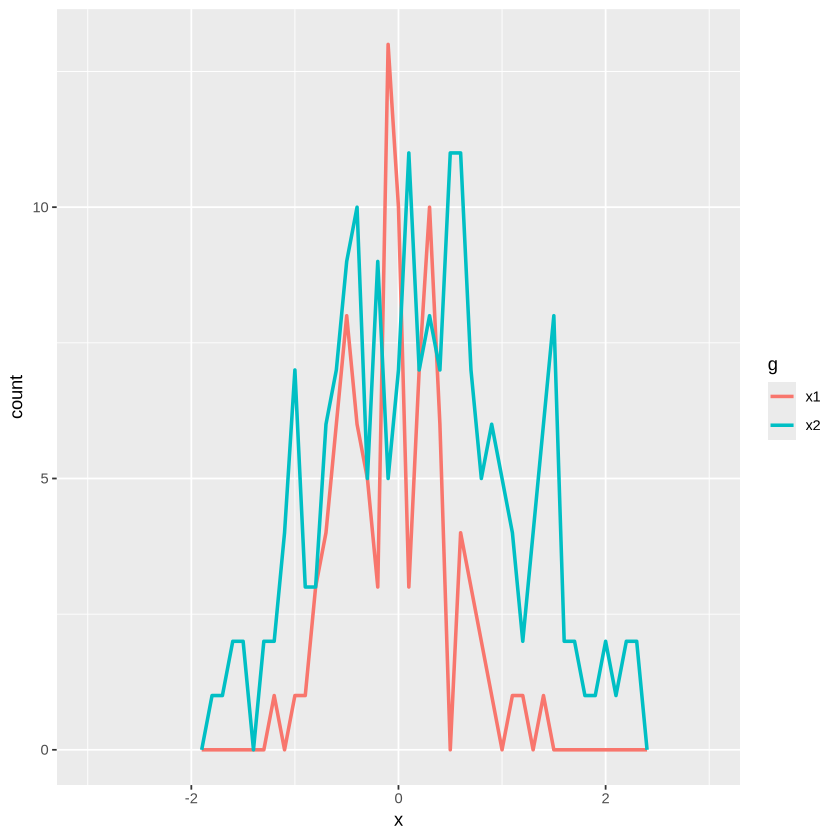

In [3]:
x1 <- rnorm(100, mean = 0, sd = 0.5)
x2 <- rnorm(200, mean = 0.15, sd = 0.9)

freqpoly(x1, x2)
#> Warning: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
#> ℹ Please use `linewidth` instead.
#> This warning is displayed once every 8 hours.
#> Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
#> generated.
cat(t_test(x1, x2))
#> p value: 0.386
#> [-0.24, 0.09]

## 3.4.2 The App  

To efficiently explore multiple simulations, a **Shiny app** is ideal—it allows interactive adjustments **without** manually modifying and re-running R code.  

### **UI Structure**  
The app layout consists of:  
1. **First row** → Three columns for input controls:  
   - Distribution 1  
   - Distribution 2  
   - Plot controls  
2. **Second row** →  
   - A **wide column** for the plot.  
   - A **narrow column** for the hypothesis test results.  

The layout uses **`fluidRow`** and **`column(n)`** functions to organize the UI elements:

- **`fluidRow`** is used to define a row that can hold multiple columns.  
- **`column(n)`** is used within a `fluidRow` to define columns that take up a specified width (out of 12 total units).  

By structuring the app this way, we can easily adjust input parameters and observe changes in real time.  



In [4]:
ui <- fluidPage(
  fluidRow(
    column(4,
      "Distribution 1",
      numericInput("n1", label = "n", value = 1000, min = 1),
      numericInput("mean1", label = "µ", value = 0, step = 0.1),
      numericInput("sd1", label = "σ", value = 0.5, min = 0.1, step = 0.1)
    ),
    column(4,
      "Distribution 2",
      numericInput("n2", label = "n", value = 1000, min = 1),
      numericInput("mean2", label = "µ", value = 0, step = 0.1),
      numericInput("sd2", label = "σ", value = 0.5, min = 0.1, step = 0.1)
    ),
    column(4,
      "Frequency polygon",
      numericInput("binwidth", label = "Bin width", value = 0.1, step = 0.1),
      sliderInput("range", label = "range", value = c(-3, 3), min = -5, max = 5)
    )
  ),
  fluidRow(
    column(9, plotOutput("hist")),
    column(3, verbatimTextOutput("ttest"))
  )
)

The server function combines calls to `freqpoly()` and `t_test()` functions after drawing from the specified distributions:

In [5]:
server <- function(input, output, session) {
  output$hist <- renderPlot({
    x1 <- rnorm(input$n1, input$mean1, input$sd1)
    x2 <- rnorm(input$n2, input$mean2, input$sd2)

    freqpoly(x1, x2, binwidth = input$binwidth, xlim = input$range)
  }, res = 96)

  output$ttest <- renderText({
    x1 <- rnorm(input$n1, input$mean1, input$sd1)
    x2 <- rnorm(input$n2, input$mean2, input$sd2)

    t_test(x1, x2)
  })
}

## 3.5 Controlling Timing of Evaluation  

In this section, we’ll explore **two advanced techniques** to **control how often** a reactive expression runs—either **increasing** or **decreasing** its execution frequency.  


### **Simplifying the Simulation App**  
To focus on timing control, we simplify the previous app:  
- Use a **single-parameter** distribution.  
- Force both samples to share the same **n**.  
- Remove **plot controls** to reduce complexity.  

This results in a **smaller UI** and **simpler server function**, making it easier to understand the key concepts of timing control in Shiny.  

In [6]:
ui <- fluidPage(
  fluidRow(
    column(3,
      numericInput("lambda1", label = "lambda1", value = 3),
      numericInput("lambda2", label = "lambda2", value = 5),
      numericInput("n", label = "n", value = 1e4, min = 0)
    ),
    column(9, plotOutput("hist"))
  )
)
server <- function(input, output, session) {
  x1 <- reactive(rpois(input$n, input$lambda1))
  x2 <- reactive(rpois(input$n, input$lambda2))
  output$hist <- renderPlot({
    freqpoly(x1(), x2(), binwidth = 1, xlim = c(0, 40))
  }, res = 96)
}

In this example, instead of manually recalculating the values each time the inputs change, reactive expressions allow the app to automatically re-evaluate and update the outputs when the inputs (`n`, `lambda1`, `lambda2`) change. This makes the app more efficient and dynamic.

## 3.5.1 Timed Invalidation  

Imagine you want to **animate** the plot by constantly resimulating the data. This would help reinforce that you’re working with **simulated data**. To achieve this, we can **increase the frequency** of updates using a special function: **`reactiveTimer()`**.  

### **How `reactiveTimer()` Works**  
`reactiveTimer()` is a **reactive expression** that depends on a hidden input: the **current time**. It allows a reactive expression to **invalidate** and **recalculate** itself more frequently than usual.  

For example, the following code sets an interval of **500 ms**, meaning the plot will update twice every second:


In [7]:
server <- function(input, output, session) {
  timer <- reactiveTimer(500)

  x1 <- reactive({
    timer()
    rpois(input$n, input$lambda1)
  })
  x2 <- reactive({
    timer()
    rpois(input$n, input$lambda2)
  })

  output$hist <- renderPlot({
    freqpoly(x1(), x2(), binwidth = 1, xlim = c(0, 40))
  }, res = 96)
}

### **Summary**  
**`reactiveTimer()`** is used to create frequent updates by invalidating a reactive expression based on time. It’s useful for animations or continuously updating data in Shiny apps.


## 3.5.2 On Click  

In the previous scenario, consider what would happen if the **simulation** took **1 second** to run. Since we’re performing the simulation every **0.5 seconds**, Shiny would continuously accumulate tasks, resulting in a **backlog**. This backlog would prevent Shiny from responding to new events, creating a poor **user experience**.  

A similar problem can occur when users **click buttons rapidly** in your app, triggering expensive computations. Shiny might not be able to catch up, leading to delays and unresponsiveness.  

### **Solution: Using `actionButton()`**  
To prevent this issue, you can allow the user to **opt-in** to perform expensive calculations. Instead of automatically triggering computations, **require the user to click a button** to start the process. This approach controls when the computation happens and avoids creating unnecessary backlogs.  

Here's an example using an `actionButton()` to trigger a simulation:


In [8]:
ui <- fluidPage(
  fluidRow(
    column(3,
      numericInput("lambda1", label = "lambda1", value = 3),
      numericInput("lambda2", label = "lambda2", value = 5),
      numericInput("n", label = "n", value = 1e4, min = 0),
      actionButton("simulate", "Simulate!")
    ),
    column(9, plotOutput("hist"))
  )
)

In [9]:
server <- function(input, output, session) {
  x1 <- reactive({
    input$simulate
    rpois(input$n, input$lambda1)
  })
  x2 <- reactive({
    input$simulate
    rpois(input$n, input$lambda2)
  })
  output$hist <- renderPlot({
    freqpoly(x1(), x2(), binwidth = 1, xlim = c(0, 40))
  }, res = 96)
}

## Solving the Problem with `eventReactive()`  

The previous solution using `actionButton()` didn’t fully achieve our goal. Although it added a button to trigger the simulation, **x1()** and **x2()** still had dependencies on **lambda1**, **lambda2**, and **n**. This means they would **update automatically** when any of these inputs changed, which isn’t what we want. We want to **replace** the existing dependencies, not just add to them.

### **Solution: Using `eventReactive()`**

To achieve this, we can use **`eventReactive()`**. This function has two arguments:  

1. The **first argument** specifies the input(s) that should trigger the computation.  
2. The **second argument** specifies the computation to run when the event is triggered.  

Using `eventReactive()`, we can ensure that **x1()** and **x2()** are only computed **when the "simulate" button is clicked**, and not when other inputs change.

Here’s how to implement it:

In [10]:
server <- function(input, output, session) {
  x1 <- eventReactive(input$simulate, {
    rpois(input$n, input$lambda1)
  })
  x2 <- eventReactive(input$simulate, {
    rpois(input$n, input$lambda2)
  })

  output$hist <- renderPlot({
    freqpoly(x1(), x2(), binwidth = 1, xlim = c(0, 40))
  }, res = 96)
}